In [1]:
# import used packages
import numpy as np
import pickle # save and load binary files (data, model)
import matplotlib.pyplot as plt

# Set jupyter display in full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# function to import and export data from cPickle format
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def save_obj(obj, name):
    with open('export/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [3]:
# Importer les données dans des array numpy (2 fichiers: features et labels). Utiliser les fonctions de pickle définies plus haut. 
# Regarder les dimensions des données.
featuresFile = 'Sigma_features.pkl'
labelFile = 'Sigma_labels.pkl'


Importation des données

In [4]:
data=unpickle(featuresFile)

In [5]:
y=unpickle(labelFile)

Observations rapides (regader les dimensions des données)

In [6]:
data

array([[625.0, 1.0, 64, ..., 1, 0, 0.0],
       [625.0, 1.0, 64, ..., 1, 0, 0.0],
       [954.0, 1.0, 64, ..., 0, 1, 0.0],
       ..., 
       [1406.0, 8.0, 2048, ..., 0, 1, 271.0],
       [1582.0, 11.0, 352, ..., 0, 1, 113.0],
       [1423.0, 8.0, 2048, ..., 0, 1, 188.0]], dtype=object)

In [7]:
data.size

7616

In [8]:
data.shape #matrice 238 par 32

(238, 32)

In [9]:
data[:,30]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [10]:
y

array([   37.94,    39.95,    39.95,    39.95,    41.95,    41.95,
          41.95,    44.95,    44.95,    49.96,    49.99,    51.95,
          52.96,    56.95,    58.96,    61.95,    69.95,    72.95,
          76.95,    78.95,    78.95,    83.95,    84.95,    89.95,
          89.95,    92.95,    92.95,    92.95,    94.96,    94.96,
          96.95,    99.95,    99.95,   104.95,   109.95,   109.96,
         119.95,   129.95,   129.95,   134.95,   134.95,   138.95,
         139.96,   139.99,   143.95,   144.95,   144.95,   149.95,
         149.95,   154.96,   154.96,   158.95,   159.95,   159.95,
         159.95,   159.95,   159.95,   164.95,   168.95,   169.96,
         169.96,   169.96,   169.96,   174.95,   175.96,   179.95,
         184.96,   184.96,   187.96,   189.95,   189.95,   194.95,
         199.96,   199.96,   199.96,   207.95,   212.95,   214.96,
         214.96,   216.95,   219.95,   219.95,   219.95,   224.95,
         229.96,   229.96,   234.95,   249.95,   259.96,   264

In [11]:
y.size

238

In [12]:
y.shape #vecteur de longueur 238, labels de "data"

(238,)

In [13]:
m = data.shape[0]

In [14]:
n = data.shape[1]

In [15]:
m

238

Ajouter le biai dans les variables.

In [16]:
data_biai = np.hstack([data,np.ones((m,1))])

In [17]:
data_biai

array([[625.0, 1.0, 64, ..., 0, 0.0, 1.0],
       [625.0, 1.0, 64, ..., 0, 0.0, 1.0],
       [954.0, 1.0, 64, ..., 1, 0.0, 1.0],
       ..., 
       [1406.0, 8.0, 2048, ..., 1, 271.0, 1.0],
       [1582.0, 11.0, 352, ..., 1, 113.0, 1.0],
       [1423.0, 8.0, 2048, ..., 1, 188.0, 1.0]], dtype=object)

In [18]:
data_biai.shape

(238, 33)

In [19]:
n+=1

Définir le modèle (regression linéaire)

In [20]:
theta = np.random.random(n)

In [21]:
theta.size

33

In [22]:
def model(x,theta2):
    y_chap=np.dot(x,theta2)
    return(y_chap)

In [23]:
y_chap = model(data_biai,theta)
y_chap.shape

(238,)

descente de gradient

In [24]:
def cout(y2,x,theta2):
    mc = sum((model(x,theta2)-y2)**2)/(2*len(y2))
    return(mc)

In [25]:
cout(y,data_biai,theta)

19242127.33031228

notre fonction de coût: 

$ Fc(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $

avec $\hat{y}_i = \sum_j\theta_{i,j} x_{i,j}$ le coût calculé pour la i-ème ligne.


On a les dérivées partielles : $\frac{d}{d\theta_j}Fc(\theta) = \frac{1}{m}\sum_{i = 1}^{m}(y_i - \hat{y}_i)x_{i,j}$

In [26]:
def df(y2,x,theta2):
    d = np.dot((model(x,theta2)-y2),x)/len(y2)
    return(d)

In [27]:
df(y,data_biai,theta)

array([7318633.078602442, 35576.807633489654, 1631444.4117673158,
       30069874.77476395, 11304323.897699663, 3804.907358358998,
       883314.1445574659, 75.57936697948536, 1136.8533405094588,
       1116.7974930876676, 298.5930417492391, 1249.6970823588433,
       586.1808229913096, 11.635648844589927, 505.282285100246,
       1121.5876137154228, 3859.0314679054177, 1066.9932927540692,
       3913.6257888667706, 84.06106385072, 34.63026514416068,
       4861.927752625959, 56.91045141750027, 8.358769628852768,
       2591.299340592427, 23.838504615763423, 11.443211428044584,
       2059.9566254482575, 228.81217848999268, 60.19162263711321,
       4920.427458983727, 631030.9314587495, 4980.619081620839], dtype=object)

descente

In [62]:
alpha = 10**(-9)
eps = 0.00001
cout1 = 2
cout2 = 1
theta = np.random.random(n)
histo = []

In [63]:
while np.abs(cout1-cout2)/cout2>eps:
    theta  = theta -alpha*df(y,data_biai,theta)
    cout1 = cout2
    cout2 = cout(y,data_biai,theta)
    histo.append(cout2)

In [64]:
print(theta)
print(cout1)
print(cout2)

[-0.006710428078374474 0.5677462034553671 -0.015570925352366047
 0.004793121482827854 0.2518349159045823 0.7902617938973776
 -0.041773450532155657 0.8281522578859051 0.20501699673110516
 0.057172788111755246 0.9861142745341215 0.9476272072729511
 0.43335792863308986 0.5060116066234416 0.6977520131262923
 0.845936068575907 0.1354819732019957 0.6093226504643551
 0.45227934440033785 0.2824498621949677 0.8836256424750214
 0.4684874000211194 0.4487376544300031 0.3066943840578734
 0.7176023773148211 0.6983982809665141 0.8422918315089915
 0.9886450804191602 0.12711633186166651 0.8618677897404082
 0.4015938526631678 0.024136543380046914 0.7138922523014462]
2676.598375490846
2676.571616272738


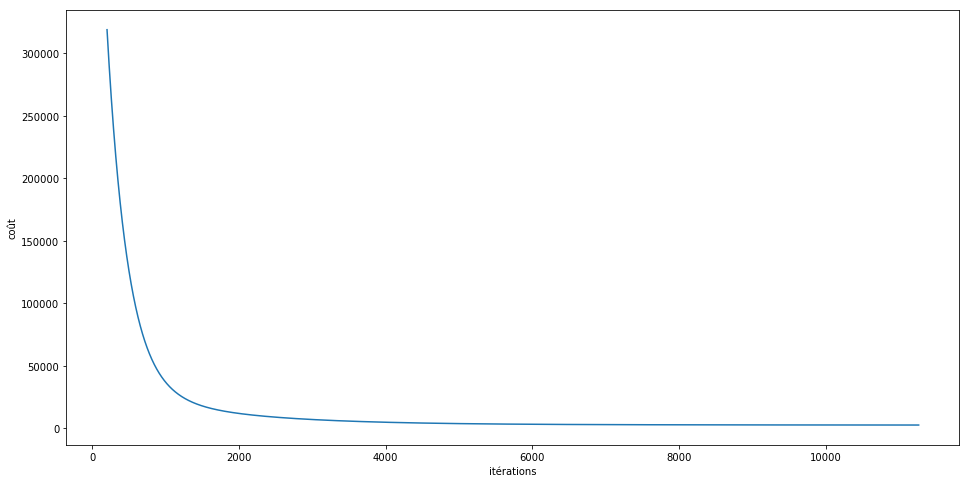

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(range(201,len(histo)+1),histo[200:])
plt.ylabel("coût")
plt.xlabel("itérations")
plt.show()

In [66]:
cout2

2676.571616272738